In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def euclidean_distance(p, q): # p and q are the data points
    return np.sqrt(np.sum((np.array(p) - np.array(q))**2))

class KNearestNeighbors:
    def __init__(self, k):
        self.k = k
        self.point = None

    def fit(self, points): # training the model means literally just having the points existing, because the points IS the trained model.
        self.points = points

    def predict(self, new_point): # calculating the distance between the one new points to predict for between points
        distances = []

        for category, points in zip(self.points.keys(), self.points.values()):
            for point in points:
                distance = euclidean_distance(new_point, point)
                distances.append([distance, category])

        categories = [category[1] for category in sorted(distances,key=lambda x: x[0])[:self.k]] # use the first element of each sublist as the key to sort.”)
        most_common = Counter(categories).most_common(1)[0][0]
        return most_common


In [4]:
model = KNearestNeighbors(3)
model.fit(points)
model.predict(new_point)

'blue'

# Using IRIS dataset

In [5]:
import pandas as pd
from pathlib import Path

data_path = Path('datasets/Iris.csv')

dataset_df = pd.read_csv(data_path).drop(columns=["Id"])
dataset_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.model_selection import train_test_split

X = dataset_df.drop(columns=['Species'])
y = dataset_df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [7]:
train_df = pd.concat([X_train, y_train], axis=1)

# Group by species and convert to dict
train_grouped = train_df.groupby("Species")
train_species_dict = {species: datapoint.drop(columns=["Species"]).values.tolist()
                for species, datapoint in train_grouped}

In [8]:
X_test = X_test.values.tolist()

model = KNearestNeighbors(5)
model.fit(train_species_dict)
y_preds = [model.predict(test_datapoint) for test_datapoint in X_test]

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# 1. Accuracy
acc = accuracy_score(y_test, y_preds)
print(f"Accuracy: {acc:.3f}")

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_preds,
                      labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])
print("Confusion Matrix:\n", cm)

# 3. Classification Report (precision, recall, f1)
print("\nClassification Report:\n",
      classification_report(y_test, y_preds,
                            target_names=['setosa','versicolor','virginica']))


Accuracy: 1.000
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [10]:
category_names = list(train_species_dict.keys())

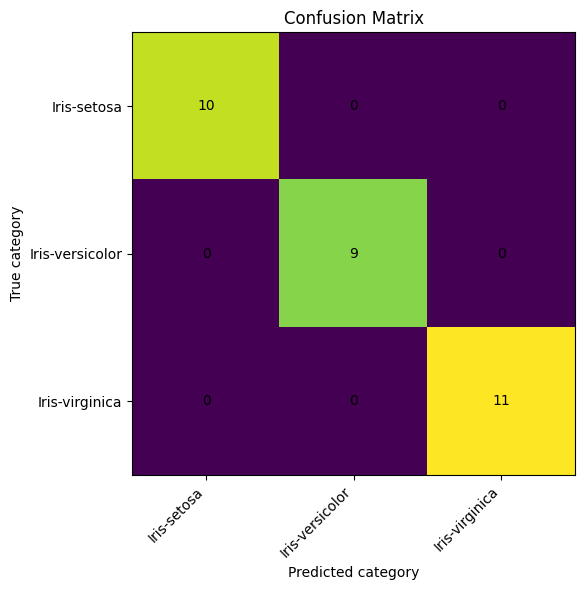

In [11]:
import matplotlib.pyplot as plt

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(cm, interpolation='nearest')
ax.set_xticks(np.arange(len(category_names)))
ax.set_yticks(np.arange(len(category_names)))
ax.set_xticklabels(category_names, rotation=45, ha='right')
ax.set_yticklabels(category_names)
ax.set_xlabel('Predicted category')
ax.set_ylabel('True category')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()